# Preparation

### Imports

In [1]:
using NBInclude;
@nbinclude("Rosenbrock_BFGS.ipynb");
@nbinclude("Rosenbrock_GD_Newton.ipynb");
@nbinclude("Visualization.ipynb")

using BenchmarkTools
using Gadfly
using StatPlots


import Cairo, Fontconfig

[80.02000000000001, 0.5277656858140837, 0.4991367940800219, 0.3932605632233049, 0.020546650349387633, 0.01991109885455737, 0.0075306663967651104, 0.0011236559443155076, 9.52922884174014e-5, 5.228298892563122e-6]
[72.60178684479462, 26.93861166284873, 3.338482494569984, 1.4711744760172556, 0.6380009876541786, 0.634127535516375, 0.5483599497844668, 0.366663121804249, 0.2742245335255895, 0.24081909512421135, 0.13704821845355872, 0.02878819283311121, 0.007223001467061242, 0.006373365577406751, 0.0010487636461163855, 0.0002746337920821001, 0.00020674895464899975, 0.00011896199070759188, 1.3352415107370807e-5, 1.094013444299292e-7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
function value in iteration 1 for x=[0.8116146242229936, 0.08709302099046456] is 32.71103481031151
function value in iteration 2 for x=[-184.38738846482212, 114.41214847342377] is 1.1481459184931062e11
function value in iteration 3 for x=[2.499134990790119e9, 6.776973787429234e6] is 3.9008464976860996e39
function v

# Mean performance of 100 runs - preparation

### Constants

In [2]:
SAMPLES = 100;
ITERS = 10000;
ERROR = 10e-6;
rate = 0.001953125; #GradientDescent
m = 4; #L-BFGS

### Variables

In [3]:
mean_iters = zeros(8);
mean_error = zeros(8);
mean_exec_time = zeros(8);
mean_alloc_bytes = zeros(8);

### Testing mean performance

In [4]:
function rosenbrock_performance(fun, samples, dimensions, max_iters, max_error=0)
    timed_history = []
    for j in 1:samples
        timed = @timed fun(rand(dimensions), max_iters, max_error)
        push!(timed_history, timed)
    end
    
    mean_iters = sum(map(h->h.value[3], timed_history))/samples
    mean_error = sum(map(h->last(h.value[2]), timed_history))/samples
    mean_exec_time = sum(map(h->h.time, timed_history))/samples
    mean_alloc_bytes = sum(map(h->h.bytes, timed_history))/samples
    
    return mean_iters, mean_error, mean_exec_time, mean_alloc_bytes
end

rosenbrock_performance (generic function with 2 methods)

In [5]:
function test_performance(fun, i)
    iters, error, time, bytes = rosenbrock_performance(fun, SAMPLES, DIMENS, ITERS, ERROR)
    mean_iters[i] = iters; mean_error[i] = error; mean_exec_time[i] = time; mean_alloc_bytes[i] = bytes;
    return iters, error, time, bytes
end

test_performance (generic function with 1 method)

### Adapters

In [6]:
gd(x, max_iters, max_error) = rosenbrock_gradient_descent(x, rate, max_iters, max_error)
lbfgs(x, max_iters, max_error) = rosenbrock_LBFGS(x, m, max_iters, max_error)

lbfgs (generic function with 1 method)

# Mean performance of 100 runs for 2 dimens

In [7]:
DIMENS = 2;

### Gradient Descent performance

In [8]:
test_performance(gd, 1)

(5385.69, 9.992041607359812e-6, 0.01091220324, 4.1181928e6)

### Newton's Method performance

In [9]:
test_performance(rosenbrock_newton, 2)

(4.86, 1.6060266494590581e-6, 0.00184071851, 333115.7)

### BFGS performance

In [10]:
test_performance(rosenbrock_BFGS, 3)

(10.43, 0.0, 0.00348843324, 508402.05)

### L-BFGS performance

In [11]:
test_performance(lbfgs, 4)

(10.4, 0.0, 0.00386437473, 518221.79)

# Mean performance of 100 runs for 4 dimens

In [12]:
DIMENS = 4;

### Gradient Descent performance

In [13]:
test_performance(gd, 5)

(10000.0, 1.7660128936252923, 0.028804862549999997, 1.0800448e7)

### Newton's Method performance

In [14]:
test_performance(rosenbrock_newton, 6)

(1312.11, 11.617033807722418, 0.02490946357, 9.40576e6)

### BFGS performance

In [15]:
test_performance(rosenbrock_BFGS, 7)

(120.11, 0.037014286104300166, 0.0058287033300000015, 3.22542067e6)

### L-BFGS performance

In [16]:
test_performance(lbfgs, 8)

(24.45, 0.0, 0.00279652829, 1.08343184e6)

# Mean performance of 100 runs - visualization

In [17]:
set_default_plot_size(18cm, 13cm)

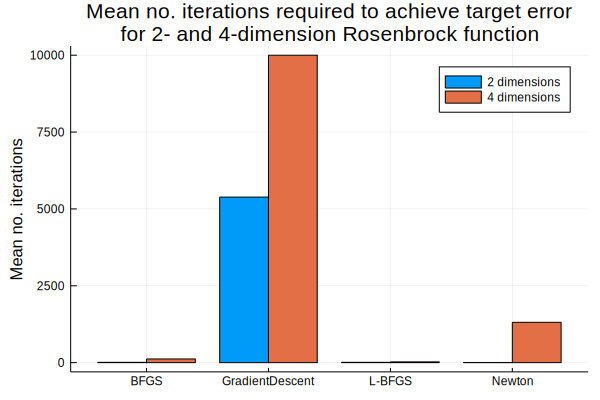

In [18]:
plt = groupedbar(
    repeat(["GradientDescent", "Newton", "BFGS", "L-BFGS"], outer=2), 
    mean_iters,
    group=repeat(["2 dimensions", "4 dimensions"], inner = 4),
    ylabel="Mean no. iterations",
    title="Mean no. iterations required to achieve target error \nfor 2- and 4-dimension Rosenbrock function",
)
savefig(plt, "plots/iterations.pdf")
plt

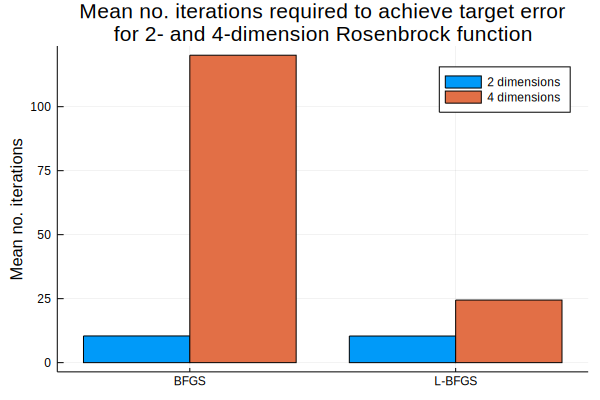

In [19]:
plt = groupedbar(
    repeat(["BFGS", "L-BFGS"], outer=2), 
    [mean_iters[i] for i in [3, 4, 7, 8]],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean no. iterations",
    title="Mean no. iterations required to achieve target error \nfor 2- and 4-dimension Rosenbrock function",
)
savefig(plt, "plots/iterations_bfgs.pdf")
plt

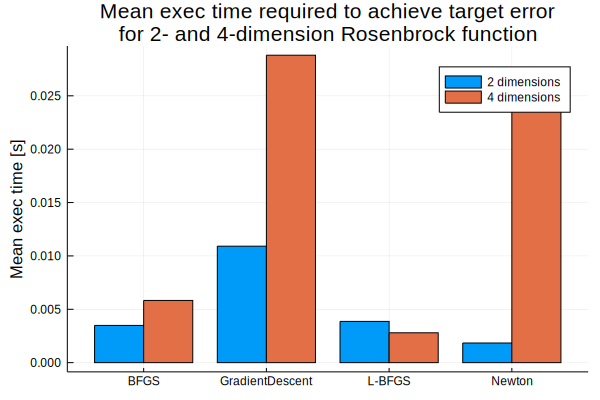

In [20]:
plt = groupedbar(
    repeat(["GradientDescent", "Newton", "BFGS", "L-BFGS"], outer=2), 
    mean_exec_time,
    group=repeat(["2 dimensions", "4 dimensions"], inner = 4),
    ylabel="Mean exec time [s]",
    title="Mean exec time required to achieve target error \nfor 2- and 4-dimension Rosenbrock function",
)
savefig(plt, "plots/time.pdf")
plt

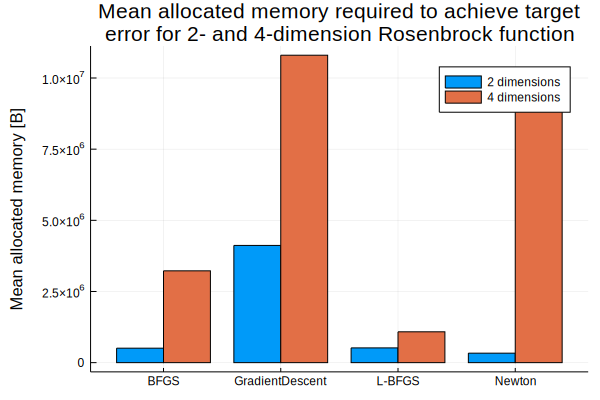

In [21]:
plt = groupedbar(
    repeat(["GradientDescent", "Newton", "BFGS", "L-BFGS"], outer=2), 
    mean_alloc_bytes,
    group=repeat(["2 dimensions", "4 dimensions"], inner = 4),
    ylabel="Mean allocated memory [B]",
    title="Mean allocated memory required to achieve target\nerror for 2- and 4-dimension Rosenbrock function",
)
savefig(plt, "plots/memory.pdf")
plt

# Visualization of Rosenbrock value change - preparation

In [22]:
theme = Theme(
    panel_fill=colorant"gray10",
    default_color=colorant"cyan",
    major_label_color=colorant"black",
    minor_label_color=colorant"black",
    key_label_color=colorant"black",
    key_title_color=colorant"black"
);

# Visualization of Rosenbrock value change for 2 dimens

In [23]:
function contour_cost_multi(
        ax1, ax2, fun, levels, trace1, trace2, trace3, trace4, each, title, xlabel, ylabel )
    set_default_plot_size(18cm, 13cm)    
    plot(
        layer(z = fun, x = ax1, y = ax2, Geom.contour(levels=levels)),
        
        layer( x=trace1[1, 1:each:end], y=trace1[2,1:each:end], Geom.point, Theme(default_color=colorant"lime")),
        layer( x=trace1[1, 1:each:end], y=trace1[2,1:each:end], Geom.line, Theme(default_color=colorant"lime") ),
        
        layer( x=trace2[1, 1:each:end], y=trace2[2,1:each:end], Geom.point, Theme(default_color=colorant"green") ),
        layer( x=trace2[1, 1:each:end], y=trace2[2,1:each:end], Geom.line, Theme(default_color=colorant"green") ),
        
        layer( x=trace3[1, 1:each:end], y=trace3[2,1:each:end], Geom.point, Theme(default_color=colorant"yellow") ),
        layer( x=trace3[1, 1:each:end], y=trace3[2,1:each:end], Geom.line, Theme(default_color=colorant"yellow") ),
        
        layer( x=trace4[1, 1:each:end], y=trace4[2,1:each:end], Geom.point, Theme(default_color=colorant"purple") ),
        layer( x=trace4[1, 1:each:end], y=trace4[2,1:each:end], Geom.line, Theme(default_color=colorant"purple") ),
        
        theme,
        Guide.title(title), Guide.xlabel(xlabel), Guide.ylabel(ylabel),
        Guide.manual_color_key("Legend", ["GradientDescent", "Newton", "BFGS", "L-BFGS"], ["lime", "green", "yellow", "purple"])
    )
end;

In [24]:
DIMENS = 2;
ITERS = 15;

In [25]:
x = rand(DIMENS)
args_gd, values_gd = gd(x, ITERS, ERROR);
args_newton, values_newton = rosenbrock_newton(x, ITERS, ERROR);
args_bfgs, values_bfgs = rosenbrock_BFGS(x, ITERS, ERROR);
args_lbfgs, values_lbfgs = lbfgs(x, ITERS, ERROR);
x

2-element Array{Float64,1}:
 0.8104374282979454
 0.2951024619343947

In [26]:
args_lbfgs

2×15 Array{Float64,2}:
 0.810437  0.636263  0.681245  0.799203  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.295102  0.402908  0.47612   0.631568     0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
SPAN = 100; LEFT = 0; RIGHT = 1.5
ax = LinRange( LEFT, RIGHT, SPAN );
levels = [LinRange(0, 100, 20)...];

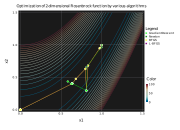

In [28]:
plt = contour_cost_multi(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), levels,
    args_gd, args_newton, args_bfgs, args_lbfgs, 1,
    "Optimization of 2-dimensional Rosenbrock function by various algorithms",
    "x1", "x2",
)
draw(PDF("plots/contour_2_multi.pdf"), plt)
plt

In [29]:
test_contour(args, name) = contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), levels,
    args, 1,
    name,
    "x1", "x2",
)

test_contour (generic function with 1 method)

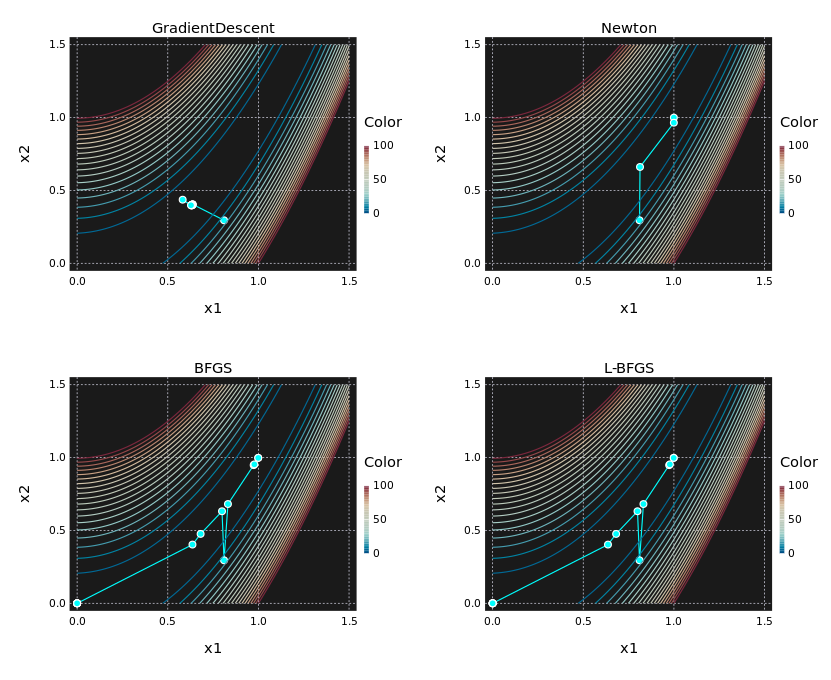

In [30]:
plot_gd = test_contour(args_gd, "GradientDescent")
plot_newton = test_contour(args_newton, "Newton")
plot_bfgs = test_contour(args_bfgs, "BFGS")
plot_lbfgs = test_contour(args_lbfgs, "L-BFGS")
plt = gridstack([plot_gd plot_newton; plot_bfgs plot_lbfgs])
draw(PDF("plots/contour_2_grid.pdf"), plt)
plt

# Visualization of Rosenbrock value change for 4 dimens

In [31]:
function visualize_training_process_multi( iters, y1, y2, y3, y4, title, xlabel, ylabel )
    set_default_plot_size(18cm, 10cm)
    plot(
        layer(x=collect(1:length(y1)), y=y1, Geom.line, Theme(default_color=colorant"lime")),
        layer(x=collect(1:length(y2)), y=y2, Geom.line, Theme(default_color=colorant"green")),
        layer(x=collect(1:length(y3)), y=y3, Geom.line, Theme(default_color=colorant"yellow")),
        layer(x=collect(1:length(y4)), y=y4, Geom.line, Theme(default_color=colorant"purple")),
        theme,
        Guide.title(title), Guide.xlabel(xlabel), Guide.ylabel(ylabel),
        Guide.manual_color_key("Legend", ["GradientDescent", "Newton", "BFGS", "L-BFGS"], ["lime", "green", "yellow", "purple"]),
        Scale.x_log10, Scale.y_log10,
    )
end;

In [32]:
DIMENS = 4;
ITERS = 200;

In [33]:
x = rand(DIMENS)

4-element Array{Float64,1}:
 0.9325828443701429
 0.5725545870354325
 0.42797792039341687
 0.680222059347698

In [34]:
_, values_gd = gd(x, ITERS, ERROR);
_, values_newton = rosenbrock_newton(x, ITERS, ERROR);
_, values_bfgs = rosenbrock_BFGS(x, ITERS, ERROR);
_, values_lbfgs = lbfgs(x, ITERS, ERROR);
x

4-element Array{Float64,1}:
 0.9325828443701429
 0.5725545870354325
 0.42797792039341687
 0.680222059347698

In [35]:
args, vals = rosenbrock_LBFGS(x, 4, 30, 10e-6)
args

4×30 Array{Float64,2}:
 0.932583  0.744808  0.831707  0.854202  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.572555  0.713706  0.747757  0.735736     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.427978  0.540262  0.618469  0.604678     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.680222  0.511617  0.361809  0.365926     0.0  0.0  0.0  0.0  0.0  0.0  0.0

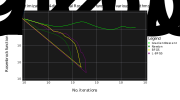

In [36]:
plt = visualize_training_process_multi(ITERS, values_gd, values_newton, values_bfgs, values_lbfgs, 
    "Optimization of 4-dimensional Rosenbrock function by various algorithms",
    "No. iterations", "Rosenbrock function value (y)")
draw(PDF("plots/contour_4_multi.pdf"), plt)
plt

### Optimized BFGS and L-BFGS (with types)

In [37]:
# Backup previous data
# 3: BFGS, 4: L-BFGS (for 2 dim)
# 7: BFGS, 8: L-BFGS (for 4 dim)
unoptimized_mean_iters = copy(mean_iters);
unoptimized_mean_error = copy(mean_error);
unoptimized_mean_exec_time = copy(mean_exec_time);
unoptimized_mean_alloc_bytes = copy(mean_alloc_bytes);

In [86]:
mean_iters = zeros(8);
mean_error = zeros(8);
mean_exec_time = zeros(8);
mean_alloc_bytes = zeros(8);

In [87]:
@nbinclude("BFGS_LBFGS_optimal.ipynb");

In [88]:
DIMENS = 2
test_performance(rosenbrock_BFGS, 3);
test_performance(lbfgs, 4);

In [89]:
DIMENS = 4
test_performance(rosenbrock_BFGS, 7);
test_performance(lbfgs, 8);

### Optimizing time

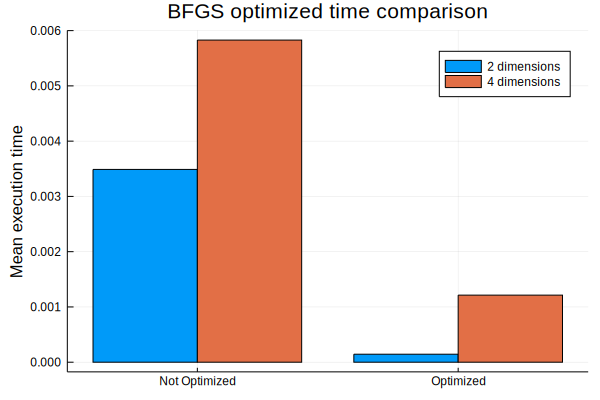

In [90]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_exec_time[3], mean_exec_time[3],
        unoptimized_mean_exec_time[7], mean_exec_time[7]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean execution time",
    title="BFGS optimized time comparison",
);
savefig(plt, "optim_plots/time_bfgs.pdf")
plt

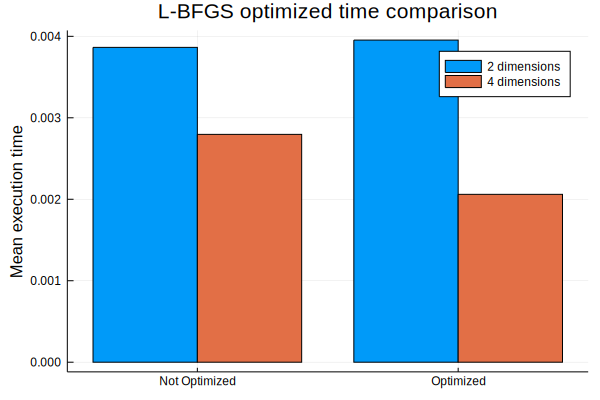

In [91]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_exec_time[4], mean_exec_time[4],
        unoptimized_mean_exec_time[8], mean_exec_time[8]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean execution time",
    title="L-BFGS optimized time comparison",
);
savefig(plt, "optim_plots/time_lbfgs.pdf")
plt

### Optimizing memory

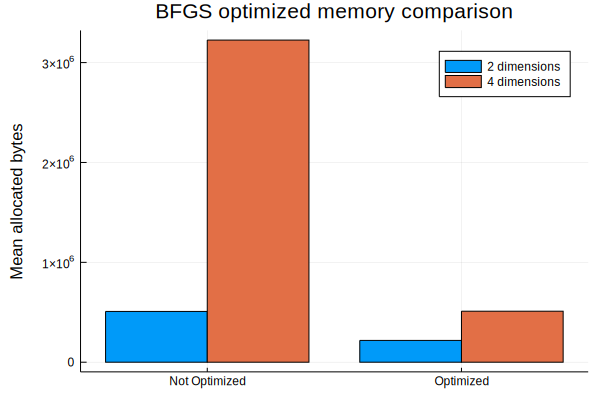

In [92]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_alloc_bytes[3], mean_alloc_bytes[3],
        unoptimized_mean_alloc_bytes[7], mean_alloc_bytes[7]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean allocated bytes",
    title="BFGS optimized memory comparison",
)
savefig(plt, "optim_plots/memory_bfgs.pdf")
plt

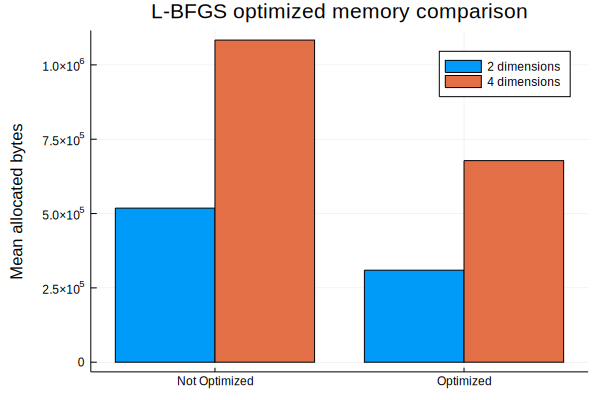

In [93]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_alloc_bytes[4], mean_alloc_bytes[4],
        unoptimized_mean_alloc_bytes[8], mean_alloc_bytes[8]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean allocated bytes",
    title="L-BFGS optimized memory comparison",
)
savefig(plt, "optim_plots/memory_lbfgs.pdf")
plt

### Optimizing iterations number

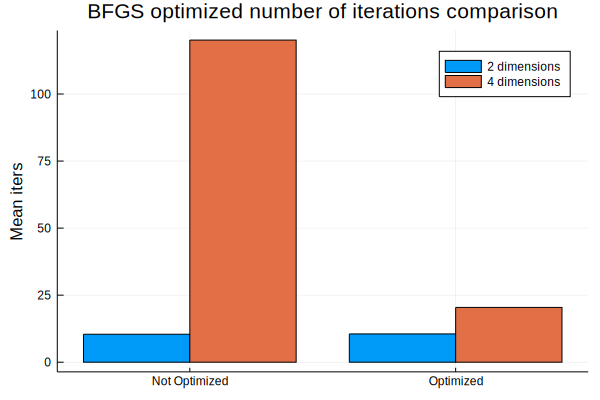

In [94]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_iters[3], mean_iters[3],
        unoptimized_mean_iters[7], mean_iters[7]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean iters",
    title="BFGS optimized number of iterations comparison",
)
savefig(plt, "optim_plots/iters_bfgs.pdf")
plt

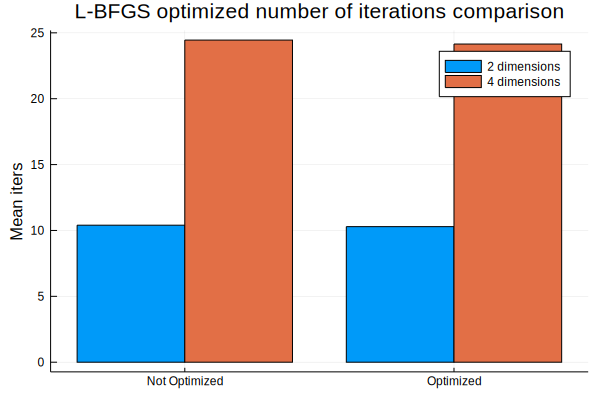

In [95]:
plt = groupedbar(
    repeat(["Not Optimized", "Optimized"], outer=2), 
    [
        unoptimized_mean_iters[4], mean_iters[4],
        unoptimized_mean_iters[8], mean_iters[8]
    ],
    group=repeat(["2 dimensions", "4 dimensions"], inner = 2),
    ylabel="Mean iters",
    title="L-BFGS optimized number of iterations comparison",
)
savefig(plt, "optim_plots/iters_lbfgs.pdf")
plt